# 1. 탐색적 데이터 분석
- 질적 변수 (명목척도) : 도수분포표, 상대도수분포표, 상관계수, 막대그래프, 파이그래프
- 양적 변수 (수치형 데이터, 등간척도, 비율척도) : 도수분포표, 상대도수분포표, 대푯값, 산포도, 왜도, 첨도, 상관계수, 줄기잎그림, 히스토그램, 오자이브, 상자그림, 산점도

## 1-1 공통

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import mstats

In [7]:
titanic = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/1-1_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
del_feature = ['PassengerId', 'Cabin']
titanic = titanic.drop(del_feature, axis=1)

qual = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']
quan = ['Age', 'SibSp', 'Parch', 'Fare']
for col in qual:
    titanic[col] = titanic[col].astype('category')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    category
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    category
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 96.2 KB


In [10]:
titanic.describe(include=['float64', 'int64'])

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.describe(include=['category'])

,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,889
unique,2,3,891,2,681,3
top,0,3,"Abbing, Mr. Anthony",male,1601,S
freq,549,491,1,577,7,644


## 1-2 질적변수
### 도수분포표

In [13]:
freq = pd.DataFrame(titanic['Survived'].value_counts())
freq

,Survived
0,549
1,342


In [14]:
freq['상대도수'] = titanic['Survived'].value_counts(normalize=True)
freq = freq.rename(columns={'Survived':'도수'})
freq

,도수,상대도수
0,549,0.616162
1,342,0.383838


### 상관계수
- 스피어만 순위계수, 켄달의 타우 : 관측치가 서열척도로 된 상관관계

In [19]:
corr, p = stats.spearmanr(titanic['Survived'], titanic['Pclass'])
print(corr, p)

corr2, p2 = stats.kendalltau(titanic['Survived'], titanic['Pclass'])
print(corr2, p2)

-0.33966793665005257 1.6876081409966053e-25
-0.32353318439409545 3.932785644652632e-24


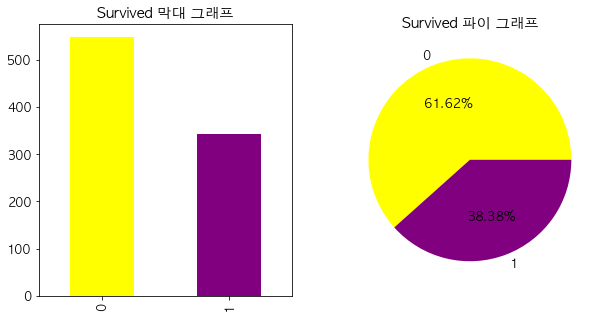

In [27]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('Survived 막대 그래프')
freq['도수'].plot.bar(ax=ax[0], color=['yellow', 'purple']);

ax[1].set_title('Survived 파이 그래프')
ax[1].pie(freq['도수'].values, labels=freq['도수'].index, 
          autopct="%.2f%%", colors=['yellow', 'purple']);

plt.show()

## 1-3 양적변수
### 도수분포표, 상대도수분포표

In [29]:
result1 = pd.cut(titanic['Age'], bins=5)
freq1 = pd.DataFrame(result1.value_counts()).reset_index()
freq1 = freq1.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')

freq1['상대도수'] = freq1['도수'].apply(lambda x : x / freq1['도수'].sum())
freq1

,계급,도수,상대도수
2,"(0.34, 16.336]",100,0.140056
0,"(16.336, 32.252]",346,0.484594
1,"(32.252, 48.168]",188,0.263305
3,"(48.168, 64.084]",69,0.096639
4,"(64.084, 80.0]",11,0.015406


In [30]:
result2 = pd.cut(titanic['Age'], bins=[0, 20, 40, 60, float('inf')], right=False)
freq2 = pd.DataFrame(result2.value_counts()).reset_index()
freq2 = freq2.rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')

freq2['상대도수'] = freq2['도수'].apply(lambda x : x / freq2['도수'].sum())
freq2

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


### 계산적 대푯값

In [32]:
ex = [1,2,3,4,5,10]

# 산술평균, 기하평균, 조화평균
print(np.mean(ex))
print(mstats.gmean(ex))
print(mstats.hmean(ex))

# 절사평균
print(mstats.tmean(ex, (1,5)))

# 평방평균 : 산술평균의 제곱근 : 비정상적 관측치 영향 부각
print(np.sqrt(np.mean(np.array(ex)**2)))

4.166666666666667
3.2598444275495897
2.5174825174825175
3.0
5.082650227325635


### 위치적 대표값

In [33]:
# 중위수, 최빈값, 1사분위수, 2사분위수, 3사분위수, 50백분위수, 75백분위수
print(titanic['Fare'].median())
print(titanic['Fare'].mode()[0])
print(titanic['Fare'].quantile(q=0.25))
print(titanic['Fare'].quantile(q=0.5))
print(titanic['Fare'].quantile(q=0.75))
print(np.percentile(titanic['Fare'], 50))
print(np.percentile(titanic['Fare'], 75))

14.4542
8.05
7.9104
14.4542
31.0
14.4542
31.0


### 절대적 산포도

In [40]:
print('range', titanic['Fare'].max() - titanic['Fare'].min())

iqr = titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
print('iqr', iqr)

md = np.mean(np.abs(np.array(titanic['Fare'])-np.mean(titanic['Fare'])))
print('평균편차', md)
print('사분편차', iqr/2)

print('모분산', titanic['Fare'].var(ddof=0))
print('표본분산', titanic['Fare'].var(ddof=1))

print('모표준편차', titanic['Fare'].std(ddof=0))
print('표본표준편차', titanic['Fare'].std(ddof=1))

range 512.3292
iqr 23.0896
평균편차 28.163691848778324
사분편차 11.5448
모분산 2466.6653116850434
표본분산 2469.436845743117
모표준편차 49.66553444477411
표본표준편차 49.693428597180905


### 상대적 산포도
- 사분위 편차계수 : 사분편차 / 중앙값
- 평균편차계수 : 평균편차 / 산술평균
- 변동계수 : 표준편차 / 산술평균 => 자료의 단위가 다르거나 평균의 차이가 클 때 평균에 대한 표준편차의 상대적 크기 비교

In [41]:
print('사분위편차계수', iqr/2/titanic['Fare'].median())
print('평균편차계수', md/titanic['Fare'].mean())
print('모집단변동계수', titanic['Fare'].std(ddof=0)/titanic['Fare'].mean())
print('표본집단변동계수', titanic['Fare'].std(ddof=1)/titanic['Fare'].mean())

사분위편차계수 0.7987159441546402
평균편차계수 0.8745345290361098
모집단변동계수 1.5422063630081684
표본집단변동계수 1.5430725278408517


### 왜도, 첨도
- 첨도 3 : 정규분포

In [44]:
print('왜도, 첨도')
print(titanic['Fare'].skew(), titanic['Fare'].kurt())

print('bias 차이')
print(stats.skew(titanic['Fare'], bias=False), stats.kurtosis(titanic['Fare'], bias=False))
print(stats.skew(titanic['Fare'], bias=True), stats.kurtosis(titanic['Fare'], bias=True))


왜도, 첨도
4.787316519674893 33.39814088089868
bias 차이
4.787316519674893 33.39814088089869
4.7792532923723545 33.20428925264474


### 상관계수 : 피어슨의 적률 상관계수

In [46]:
titanic = titanic.dropna(axis=0)
corr, p = stats.pearsonr(titanic['Age'], titanic['Fare'])
corr, p

(0.09314251789411518, 0.012904553407042496)

### 양적변수 탐색 시각화

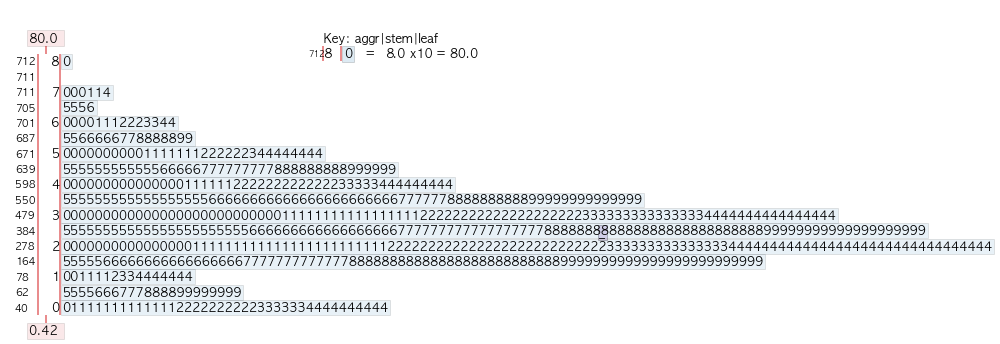

In [48]:
import stemgraphic
stemgraphic.stem_graphic(titanic['Age'])
plt.show()

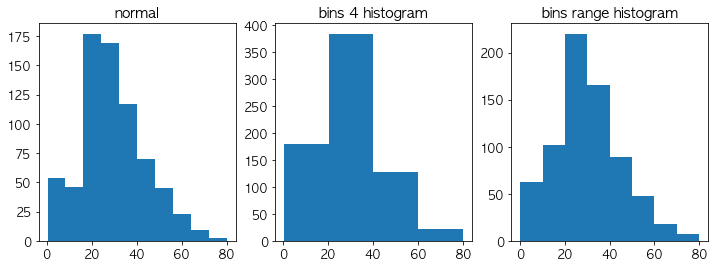

In [49]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax[0].hist(titanic['Age'])
ax[0].set_title('normal')
ax[1].hist(titanic['Age'], bins=4)
ax[1].set_title('bins 4 histogram')
ax[2].hist(titanic['Age'], bins=[i for i in range(0, 90, 10)])
ax[2].set_title('bins range histogram')
plt.show()

         계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  154   563  35.0
3  (40, 50]   86   649  45.0
5  (50, 60]   42   691  55.0
6  (60, 70]   16   707  65.0
7  (70, 80]    5   712  75.0


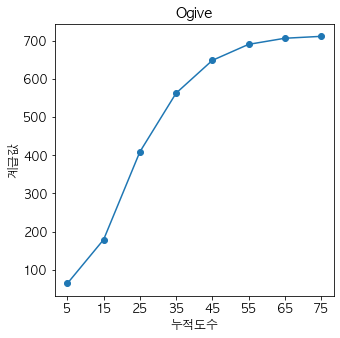

In [55]:
result1 = pd.cut(titanic['Age'], bins=[i for i in range(0, 90, 10)])
freq1 = pd.DataFrame(result1.value_counts()).reset_index().rename(columns={'index':'계급', 'Age':'도수'}).sort_values(by='계급')
freq1['누적도수'] = freq1['도수'].cumsum()
freq1['계급값'] = freq1['계급'].apply(lambda x: np.median([x.left, x.right]))
print(freq1)

plt.plot(freq1['계급값'], freq1['누적도수'], marker='o');
plt.xticks(freq1['계급값'])
plt.xlabel('누적도수')
plt.ylabel('계급값')
plt.title('Ogive')
plt.show()

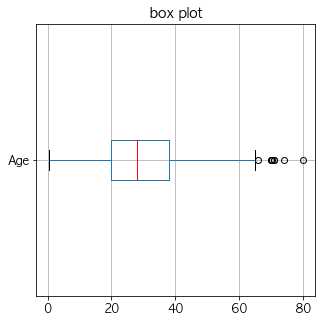

In [60]:
titanic[['Age']].boxplot(vert=False, medianprops={'color':'red'})
plt.title('box plot')
plt.yticks(ticks=[1], labels=['Age'])
plt.show()

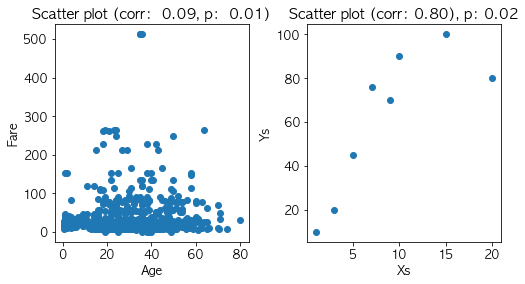

In [68]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)

ax[0].scatter(titanic['Age'], titanic['Fare']);
ax[0].set_title(f"Scatter plot (corr: {stats.pearsonr(titanic['Age'], titanic['Fare'])[0]: .2f}, p: {stats.pearsonr(titanic['Age'], titanic['Fare'])[1]: .2f})")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Fare')

Xs = [1,3,5,7,9,15,20,10]; Ys = [10,20,45,76,70,100,80,90]
ax[1].scatter(Xs, Ys)
ax[1].set_title(f"Scatter plot (corr: {stats.pearsonr(Xs, Ys)[0]:.2f}), p: {stats.pearsonr(Xs, Ys)[1]:.2f}")
ax[1].set_xlabel('Xs')
ax[1].set_ylabel("Ys")

plt.show()


In [160]:
# prob 1
df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [162]:
quan_features = [feat for feat in df.columns if df[feat].dtypes == int]
df[quan_features].describe().round(2)

,age,balance
count,4521.00,4521.00
mean,41.17,1422.66
std,10.58,3009.64
min,19.00,-3313.00
25%,33.00,69.00
50%,39.00,444.00
75%,49.00,1480.00
max,87.00,71188.00


In [163]:
freq = pd.DataFrame(df['y'].value_counts())
freq

,y
no,4000
yes,521


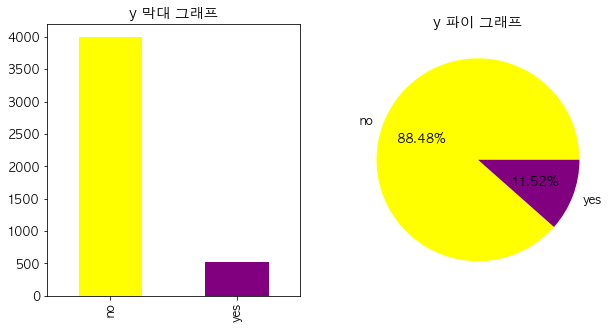

In [164]:
# 도수분포표 이용

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('y 막대 그래프')
freq['y'].plot.bar(ax=ax[0], color=['yellow', 'purple']);

ax[1].set_title('y 파이 그래프')
ax[1].pie(freq['y'].values, labels=freq['y'].index, 
          autopct="%.2f%%", colors=['yellow', 'purple']);

plt.show()

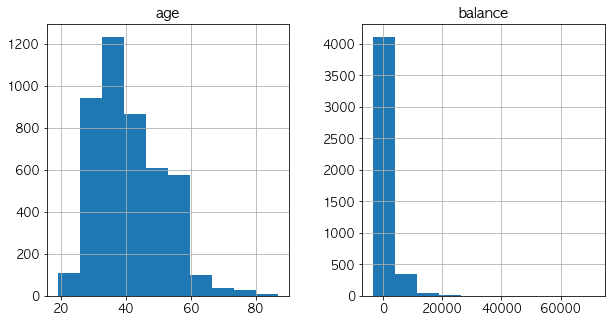

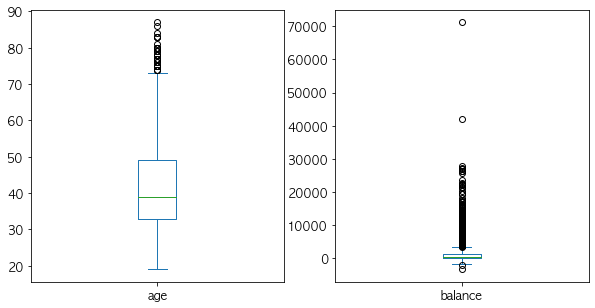

In [140]:
plt.rcParams['figure.figsize'] = (10,5)

df[quan_features].hist();
plt.show()

df[quan_features].plot(kind='box', subplots=True)
plt.show()

In [136]:
qual_features = [feat for feat in df.columns if df[feat].dtypes == object]
df[qual_features].describe().round(2)

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


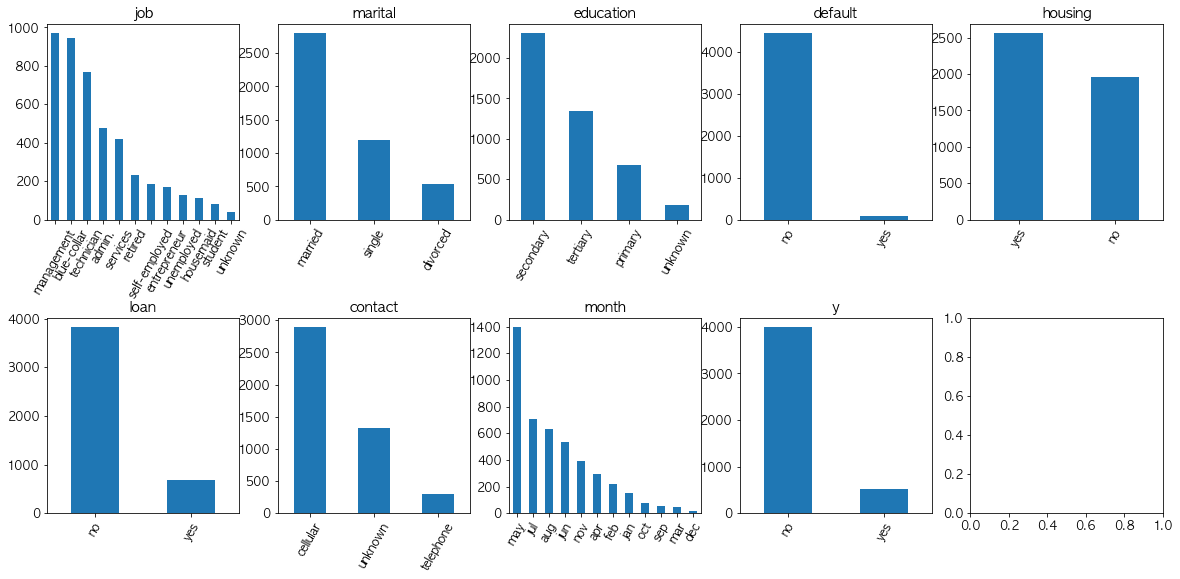

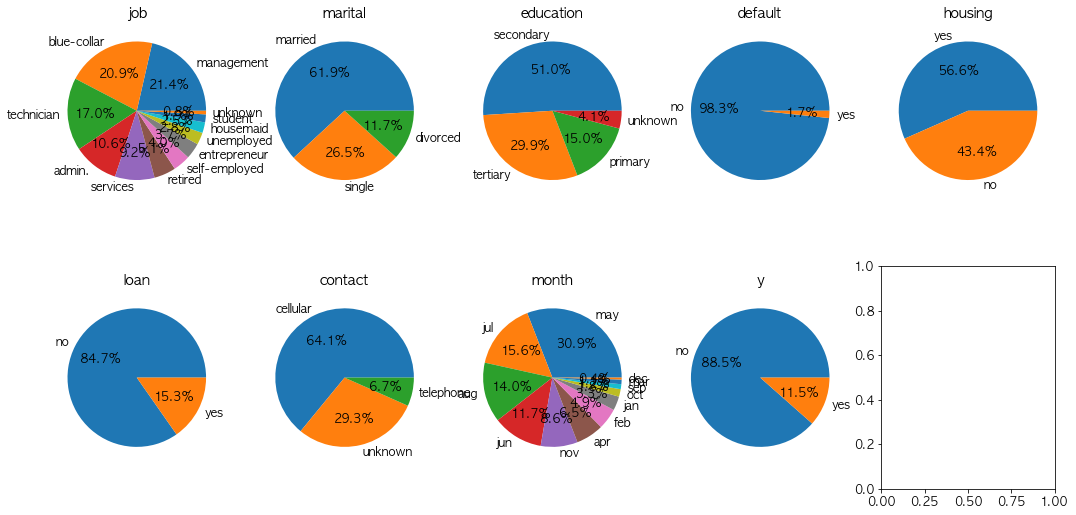

In [145]:
# 막대그래프로 범주 빈도 비교 & 파이그래프로 범주 비율 확인

fig, axes = plt.subplots(2, 5, figsize=(20,9))
plt.subplots_adjust(hspace=0.5)
for ax, feature in zip(axes.ravel(), qual_features):
    ax.set_title(feature)
    df[feature].value_counts().plot.bar(ax=ax, rot=60);
plt.show()

fig, axes = plt.subplots(2,5, figsize=(18,9))
for ax, feature in zip(axes.ravel(), qual_features):
    ax.set_title(feature)
    table = df[feature].value_counts()
    ax.pie(table.values, labels=table.index, autopct="%.1f%%");
plt.show()

In [98]:
freq = pd.DataFrame(df['y'].value_counts())
freq

,y
no,4000
yes,521


In [120]:
features = set(df.columns) - set('y')
corr_df = pd.DataFrame(np.zeros((len(df.columns))), index=df.columns)
for col in features:
    corr, _ = stats.spearmanr(df[col], df['y'])
    corr_df.loc[col] = abs(corr)

corr_df.sort_values(by=0, ascending=False)

,0
contact,0.129544
housing,0.104683
balance,0.078982
loan,0.070517
education,0.048077
month,0.032639
job,0.029952
marital,0.019327
age,0.016271
default,0.001303


In [123]:
age = pd.cut(df['age'], bins=10)
freq = pd.DataFrame(age.value_counts()).reset_index()
freq = freq.rename(columns={'index':'계급', 'age':'도수'}).sort_values(by='계급')

freq['상대도수'] = freq['도수'].apply(lambda x : x / freq['도수'].sum())
freq

,계급,도수,상대도수
5,"(18.932, 25.8]",111,0.024552
1,"(25.8, 32.6]",944,0.208803
0,"(32.6, 39.4]",1235,0.273170
2,"(39.4, 46.2]",869,0.192214
3,"(46.2, 53.0]",706,0.156160
4,"(53.0, 59.8]",482,0.106614
6,"(59.8, 66.6]",100,0.022119
7,"(66.6, 73.4]",36,0.007963
8,"(73.4, 80.2]",30,0.006636
9,"(80.2, 87.0]",8,0.001770


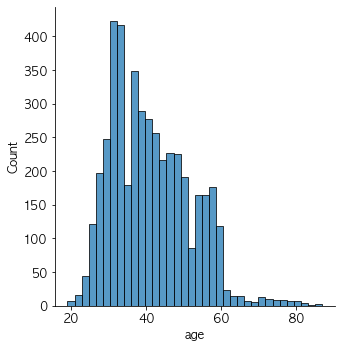

In [126]:
sns.displot(data=df, x='age', kind='hist');

In [166]:
# prob 1.2
data = [0.04, .03, .05, .1, .08]
data = np.array(data) + 1
a1 = stats.gmean(data) - 1
print("geometric mean", a1)

geometric mean 0.059681276222572244


In [167]:
# prob 1.3
data = [5,7]
a1 = stats.hmean(data)
print("harmonic mean", a1)

harmonic mean 5.833333333333333


In [168]:
# prob 1.4
# standard coefficient 
hamburger = (210 - 200)/49
sandwitch = (210 - 190)/36
print(hamburger - sandwitch)

-0.35147392290249435


In [169]:
# prob 1.5
# 변동 계수
a = 2/10 ; b = 1/8
print(a-b)

0.07500000000000001
